# Regressão logística.
Podemos entender regressão logística como análoga de regressão linear para problemas de classificação, esse tipo de problema surge quando queremos categorizar algumas variáveis por classes, quando isso acontece,  a variavel $y$ que queremos prever é discreta. Como exemplo ilustrativo, vamos supor que somos uma agência de seguros e estamos decidindo se devemos ou não segurar um carro, com base nas informações sociais dos seus donos. Por motivos de simplicidade, vamos dizer que a probabilidade da pessoa bater o carro só dependa do tempo que ela gastou na autoescola; nós temos acesso a esse tempo, mas não sabemos exatamente como ele se relaciona com a probabilidade da pessoa segurada sofrer um acidente automobilístico.
$\newline$ É a técnica que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categorica, frequentemente binária, a partir de uma serie de variaveis explicativas continuas ou binárias, aonde geralmente é encontrado:
* Na medicina, permite determinar os factores que caracterizam grupos de individuos doentes em relação a individuos.
* Dominio de seguros, encotra fracções da clientela que sejam sensível a determinada politica.
* Em instituições finaceiras, pode detectar os grupos de risco para a subscrição de um crédito.
* Em econometria. permite explicar uma variável, discreta como intenções de voto em actos eleitores.

## Descrição.
Ela analisa dados distribuidos binomealmente da forma.
$$Y_i ~ B(p_i, n_i), \text{for}; i = 1 , ...,m.$$
* $n_i$ números de ensaios.
* provabilidade dos exito $p_i$ que são desconhecidas.
O modelo é então obtido na base de que cara valor $i$ e o conjunto de variáveis explicativas/independentes possa informar acerca da prababilidade final, estas variáveis explicativas podem-se ver como um vector $X_i$ k-dimensional e o modelo toma a forma:
$$p_i = E(\frac{Y_i}{n_i}| X_i)$$

![gif](https://miro.medium.com/max/2000/0*1KnKYuv0UDu_1-qM.gif)



## Vantagens.
* O modelo não atua somente como um classificador, também fornece um valor de probabilidade para cada instância classificada.
* É um modelo relativamente fácil de implementar, interpretar, é rapido e possui um bom desempenho.
* Os coeficientes da regressão logística dão uma ideia do quão relevante é um atributo para a predição peso.

## Desvantagens.
* Pode ocorrer erros de overfitting quando e submetido a modelos de alta dimensionalidade.
* Requer uma atenção maior com o pré-processamento dos dados quando comparado aos outros modelos de classificação.
* Pode ocorrer problemas com outliers ou seja variáveis com uma influência muito maior para a classificação do que as demais.

# Pratica.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from matplotlib import rcParams

from scipy.stats import spearmanr
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
orig = 'mtcars.csv'
cars = pd.read_csv(orig)
cars.columns = {'car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'}

In [5]:
cars_col = {'drat','carb'}
cars_dados = cars[cars_col].values


In [6]:
y = cars['am'].values

<AxesSubplot:xlabel='drat', ylabel='carb'>

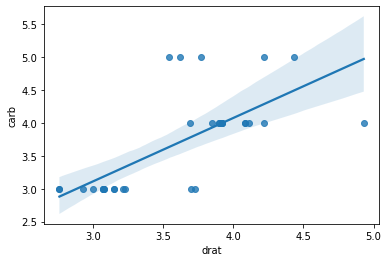

In [7]:
sns.regplot(x='drat',y='carb', data=cars, scatter=True)

In [8]:
drat = cars['drat']
carb = cars['carb']

spearmanr, p = spearmanr(drat,carb)
print(spearmanr)

0.7448161670862097


In [11]:
cars.isnull().sum().head()

gear         0
disp         0
wt           0
car_names    0
qsec         0
dtype: int64

<AxesSubplot:xlabel='am', ylabel='count'>

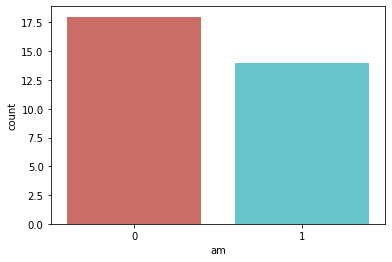

In [12]:
sns.countplot(x='am', data=cars, palette='hls')

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gear       32 non-null     object 
 1   disp       32 non-null     float64
 2   wt         32 non-null     int64  
 3   car_names  32 non-null     float64
 4   qsec       32 non-null     int64  
 5   drat       32 non-null     float64
 6   hp         32 non-null     float64
 7   mpg        32 non-null     float64
 8   am         32 non-null     int64  
 9   cyl        32 non-null     int64  
 10  carb       32 non-null     int64  
 11  vs         32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [14]:
X = scale(cars_dados)

In [15]:
reg_log = LogisticRegression().fit(X, y)
print(reg_log.score(X, y))

0.71875


In [16]:
y_pred = reg_log.predict(X)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.67      0.71      0.69        14

    accuracy                           0.72        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.72      0.72      0.72        32

